Scatter plot of orthogonal sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import numexpr as ne
import math
import timeit
import jax.numpy as jnp
import matplotlib.pyplot as plt

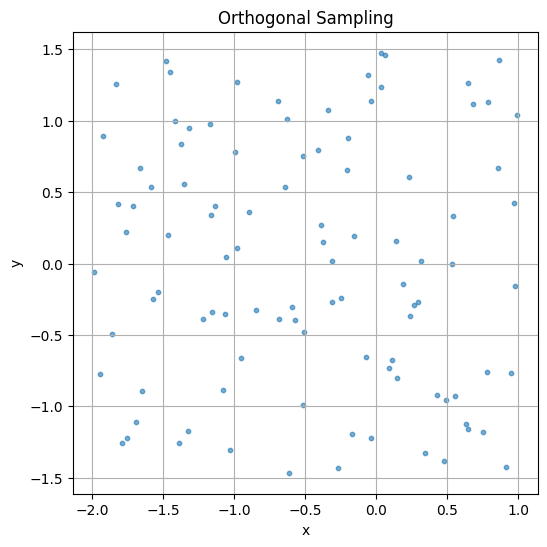

In [2]:
def orthogonal_sampling(n_sampl):
    x_min, x_max, y_min, y_max = -2, 1, -1.5, 1.5
    x_len = x_max - x_min
    y_len = y_max - y_min
    x_h = x_len / n_sampl
    y_h = y_len / n_sampl
    
    # Generate orthogonal sampling in x
    x = np.array([np.random.uniform(x_min + x_h * a, x_min + x_h * (a + 1), n_sampl) for a in range(n_sampl)])
    for a in range(n_sampl):
        np.random.shuffle(x[:,a])
    
    # Generate orthogonal sampling in y
    y = np.array([np.random.uniform(y_min + y_h * a, y_min + y_h * (a + 1), n_sampl) for a in range(n_sampl)])
    for a in range(n_sampl):
        np.random.shuffle(y[a:,])

    return x, y

n_sampl = 10

x_orths, y_orths = orthogonal_sampling(n_sampl)

plt.figure(figsize=(6, 6))
plt.scatter(x_orths, y_orths, alpha=0.6, s=10)  
plt.title('Orthogonal Sampling')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)


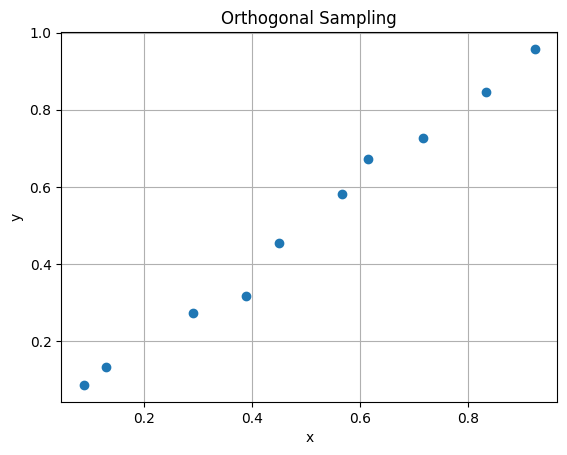

In [3]:
def orthogonal_sampling(n_sampl):
    x_min, x_max, y_min, y_max = 0, 1, 0, 1
    x_len = x_max - x_min
    y_len = y_max - y_min
    x_h = x_len / n_sampl
    y_h = y_len / n_sampl
    x_array = np.array([x_min + x_h * a for a in range(n_sampl + 1)])
    y_array = np.array([y_min + y_h * a for a in range(n_sampl + 1)])
    x = np.array([np.random.uniform(x_array[a], x_array[a + 1], 1) for a in range(n_sampl)])
    y = np.array([np.random.uniform(y_array[a], y_array[a + 1], 1) for a in range(n_sampl)])
    
    return x, y

n_samples = 10
x, y = orthogonal_sampling(n_samples)

plt.scatter(x, y, label='Orthogonal Sampling')
plt.title('Orthogonal Sampling')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Orthogonal sampling to estimate are of mandelbrot set

In [4]:
def mandel_check(c, max_iter):
    limit = 0
    n = 0
    while abs(limit) <= 2 and n < max_iter:
        limit = limit*limit + c
        n += 1
    if n == max_iter:
        return max_iter
    else:
        # Gradient for picture
        return n + 1 - np.log(np.log2(abs(limit)))

def area_mandel(n_sampl, max_iter):
    x_min = -2
    x_max = 1
    y_min = -1.5
    y_max = 1.5
    sampler = 0
    hit = 0
    while sampler < n_sampl:
        # Sample
        x = np.random.uniform(x_min, x_max)
        y = np.random.uniform(y_min, y_max)
        sampler += 1
        c = x + 1j * y
        # Check
        cheker = mandel_check(c, max_iter)
        if cheker == max_iter:
            hit += 1
    area = (x_max - x_min) * (y_max - y_min) * (hit / sampler)
    return area

def orthogonal_sampling_mandelbrot_area(grid_size, max_iter):
    x_min, x_max, y_min, y_max  = -2, 1, -1.5, 1.5

    x_vals = np.linspace(x_min, x_max, grid_size)
    y_vals = np.linspace(y_min, y_max, grid_size)
    grid_points = np.array(np.meshgrid(x_vals, y_vals)).T.reshape(-1, 2)
    
    inside_set = np.sum([mandel_check(complex(c[0], c[1]), max_iter) == max_iter for c in grid_points])

    area_estimate = inside_set / grid_size**2 * (x_max - x_min) * (y_max - y_min)

    return area_estimate

estimated_area = orthogonal_sampling_mandelbrot_area(1000, 100)

print(f"Estimated Area of the Mandelbrot Set: {estimated_area}")

Estimated Area of the Mandelbrot Set: 1.5431759999999999


In [5]:
def orthogonal_sampling(n, d):
    lower_limits = np.arange(0, n, dtype=float) / n
    upper_limits = np.arange(1, n + 1, dtype=float) / n
    print(upper_limits)
    random_points = np.zeros((n, d))
    for i in range(d):
        random_points[:, i] = np.linspace(lower_limits[i], upper_limits[i], n, endpoint=False) + \
                              np.random.uniform(0, 1/n, n)

    return random_points

orthogonal_samples = orthogonal_sampling(10, 5)

print("Orthogonal Sampling:")
print(orthogonal_samples)


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Orthogonal Sampling:
[[0.0386099  0.11135313 0.21082574 0.36565716 0.4694757 ]
 [0.08929705 0.18182746 0.24392599 0.31988763 0.46660971]
 [0.11349772 0.13990376 0.25388393 0.34200153 0.4919575 ]
 [0.04154981 0.13636475 0.25421075 0.35154768 0.49923953]
 [0.08856838 0.16887125 0.28451155 0.41243075 0.48946347]
 [0.09409508 0.21551702 0.34761233 0.3571135  0.48138227]
 [0.13172362 0.21474945 0.34504433 0.44157562 0.54526707]
 [0.07669176 0.23580571 0.33575757 0.42477881 0.4927931 ]
 [0.09038159 0.26503954 0.33599093 0.43836392 0.57890706]
 [0.13426461 0.23592657 0.36257257 0.44306465 0.51792878]]


In [6]:
def generate_samples(n_sampl, minmax):
    #print(n_sampl)
    xmin , xmax = minmax
    intervals = np.linspace(xmin, xmax, n_sampl+1)
    #print(intervals)
    f = lambda pair: np.random.uniform(pair[0], pair[1])
    mapflt = lambda f, xs: map(f, zip(xs, xs[1:]))
    points = list(mapflt(f, intervals))
    #print(points)
    return points

def orthogonal_sampling(total_samples, dimensions, num_cores):
    samples_per_core = (total_samples) // (num_cores)
    strata_per_core = [np.linspace(-2, 0.5, (num_cores + 1)), np.linspace(-1.5, 1.5, (num_cores + 1))]

    f = lambda x, y: (x[y], x[y + 1])
    results = Parallel(n_jobs=num_cores)(
        delayed(generate_samples)(samples_per_core, f(strata, core)) for core, strata in enumerate(strata_per_core)
    )

    combined_samples = np.concatenate(results)
    return combined_samples.T

def orthogonal_sampling_mandelbrot_check(chunk, max_iter):
    cheker = jnp.zeros(chunk.shape, dtype=complex)
    hit = jnp.zeros(chunk.shape, dtype=float)
    for _ in range(max_iter):
        mask = jnp.abs(cheker) <= 2
        cheker = ne.evaluate('where(mask, cheker**2 + chunk, cheker)')
        hit = ne.evaluate('where(mask, hit + 1, hit)')
    return jnp.sum(mask), len(chunk)

def orthogonal_sampling_parallel_mandelbrot(c, max_iter, num_cores):
    chunks = jnp.array_split(c, num_cores)
    results = Parallel(n_jobs=num_cores)(
        delayed(orthogonal_sampling_mandelbrot_check)(chunk, max_iter) for chunk in chunks
    )
    total_hits = jnp.sum(np.fromiter((hit for hit, _ in results), dtype=int))
    total_samples = jnp.sum(np.fromiter((sampl for _, sampl in results), dtype=int))

    return total_hits, total_samples

def transform_points_to_complex(points, x_min, x_max, y_min, y_max):
    x_points = points[:, 0]
    y_points = points[:, 1]
    np.random.shuffle(y_points)
    return ne.evaluate('x_points + 1j * y_points')


def calculate_area_of_mandelbrot(total_samples, max_iter, num_cores, x_min, x_max, y_min, y_max):
    points = orthogonal_sampling(total_samples, 2, num_cores)
    c = transform_points_to_complex(points, x_min, x_max, y_min, y_max)
    hits, samples = orthogonal_sampling_parallel_mandelbrot(c, max_iter, num_cores)
    mandelbrot_area = (x_max - x_min) * (y_max - y_min) * (hits / samples)
    return mandelbrot_area

# Example usage:
max_iter = 1000
num_cores = 8
total_samples = 10**6
x_min, x_max, y_min, y_max = -2, 0.5, -1.5, 1.5

area = calculate_area_of_mandelbrot(total_samples, max_iter, num_cores, x_min, x_max, y_min, y_max)
print(f"Estimated area of the Mandelbrot set: {area}")


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [7]:
def area_mandel_vect_numexpr(n_sampl, max_iter):
    x_min, x_max, y_min, y_max = -2, 1, -1.5, 1.5
    x = np.random.uniform(x_min, x_max, n_sampl)
    y = np.random.uniform(y_min, y_max, n_sampl)
    c = ne.evaluate("x + 1j * y")
    cheker = jnp.zeros(c.shape, dtype=complex)
    hit = jnp.zeros(c.shape, dtype=int)
    for _ in range(max_iter):
        mask = jnp.abs(cheker) <= 2
        cheker = ne.evaluate('where(mask, cheker**2 + c, cheker)')
        hit = ne.evaluate('where(mask, hit + 1, hit)')
    return jnp.sum(mask), n_sampl
# Here I extract results and combine them to calculate area
def result_extraction_simple_numexpr(total_samples, max_iter, num_cores):
    samples_per_core = total_samples // num_cores
    results = Parallel(n_jobs=num_cores)(
        delayed(area_mandel_vect_numexpr)(samples_per_core, max_iter) for core in range(num_cores)
    )
    hits = jnp.sum(np.fromiter((hit for hit, _ in results), dtype=float))
    samples = jnp.sum(np.fromiter((sampler for _, sampler in results), dtype=float))
    x_min, x_max, y_min, y_max = -2, 1, -1.5, 1.5
    area = (x_max - x_min) * (y_max - y_min) * (hits / samples)
    return area